In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [99]:
# Reading data
df = pd.read_csv('Data/archive/Melbourne_Housing_Data_Cleaned.csv')

In [100]:
df.head()

,Suburb,Address,Rooms,Type,Price,Date,Distance,Postcode,Bathroom,Car,LandArea,Council,Latitude,Longitude,Region,State
0,Abbotsford,85 Turner St,2,h,1480000.0,3/12/2016,2.5,3067,1,1,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,VIC
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,2.5,3067,1,0,156.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,VIC
2,Abbotsford,5 Charles St,3,h,1465000.0,4/03/2017,2.5,3067,2,0,134.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,VIC
3,Abbotsford,40 Federation La,3,h,850000.0,4/03/2017,2.5,3067,2,1,94.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,VIC
4,Abbotsford,55a Park St,4,h,1600000.0,4/06/2016,2.5,3067,1,2,120.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,VIC


In [101]:
# Dropping irrelevant columns
df = df.drop(columns=['Address', 'Date', 'Postcode', 'Council', 'Latitude', 'Longitude', 'State', 'Region'])

In [102]:
df.head()

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,LandArea
0,Abbotsford,2,h,1480000.0,2.5,1,1,202.0
1,Abbotsford,2,h,1035000.0,2.5,1,0,156.0
2,Abbotsford,3,h,1465000.0,2.5,2,0,134.0
3,Abbotsford,3,h,850000.0,2.5,2,1,94.0
4,Abbotsford,4,h,1600000.0,2.5,1,2,120.0


In [103]:
# One-Hot Encoding of categorical values
df_encoded = pd.get_dummies(df, columns=['Suburb', 'Type'], drop_first=True)

In [104]:
df_encoded.head()

,Rooms,Price,Distance,Bathroom,Car,LandArea,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,...,Suburb_Williamstown North,Suburb_Windsor,Suburb_Wollert,Suburb_Wonga Park,Suburb_Wyndham Vale,Suburb_Yallambie,Suburb_Yarra Glen,Suburb_Yarraville,Type_t,Type_u
0,2,1480000.0,2.5,1,1,202.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1035000.0,2.5,1,0,156.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1465000.0,2.5,2,0,134.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,850000.0,2.5,2,1,94.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,1600000.0,2.5,1,2,120.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [105]:
# Splitting features from label
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [108]:
# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 323894.0779828819


In [109]:
# Entering property features
suburb = input()

South Yarra


In [110]:
property_type = input()

h


In [111]:
bedrooms = input()

3


In [112]:
bathrooms = input()

2


In [113]:
car_spaces = input()

1


In [114]:
distance = float(input())

3


In [115]:
land_area = float(input())

300


In [116]:
# Creating a new dataframe for the input
new_data = pd.DataFrame({
    'Suburb': [suburb],
    'Rooms': [bedrooms],
    'Type': [property_type],
    'Bathroom': [bathrooms],
    'Car': [car_spaces],
    'Distance': [distance],
    'LandArea': [land_area]
})

new_data

,Suburb,Rooms,Type,Bathroom,Car,Distance,LandArea
0,South Yarra,3,h,2,1,3.0,300.0


In [117]:
# Preprocessing the new data in the same way as the training data
new_data = pd.get_dummies(new_data, columns=['Suburb', 'Type'], drop_first=True).reindex(columns = X.columns, fill_value=0)
new_data_scaled = scaler.transform(new_data)

# Making predictions
predicted_price = rf_model.predict(new_data_scaled)

print(f"Expected Price: ${predicted_price[0]}")

Expected Price: $1913960.0


In [118]:
selected_features = ['Rooms', 'Bathroom', 'Car', 'Distance', 'LandArea']

# Get feature importances
importances = rf_model.feature_importances_

# Map importances to feature names
feature_importances = {feature: importance for feature, importance in zip(X.columns, importances) if feature in selected_features}

# Display feature importances
for feature, importance in sorted(feature_importances.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")


Distance: 0.24388564063239407
LandArea: 0.18309102891503773
Rooms: 0.1236300559330552
Bathroom: 0.11061268497235262
Car: 0.03090877553495059


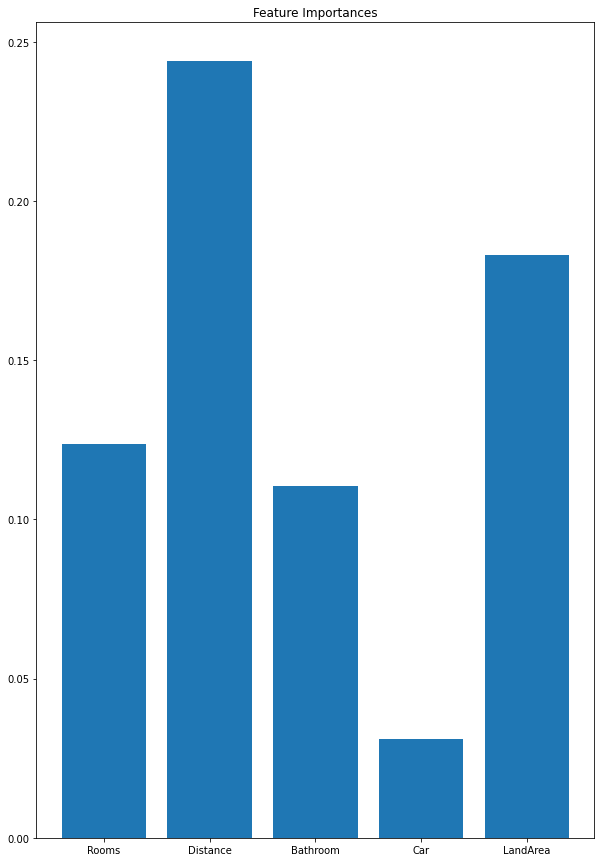

In [126]:
import matplotlib.pyplot as plt

# Feature importance visualization
plt.figure(figsize=(10, 15))
plt.bar(range(len(feature_importances)), feature_importances.values())
plt.xticks(range(len(feature_importances)), feature_importances.keys())
plt.title("Feature Importances")
plt.show()


In [127]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

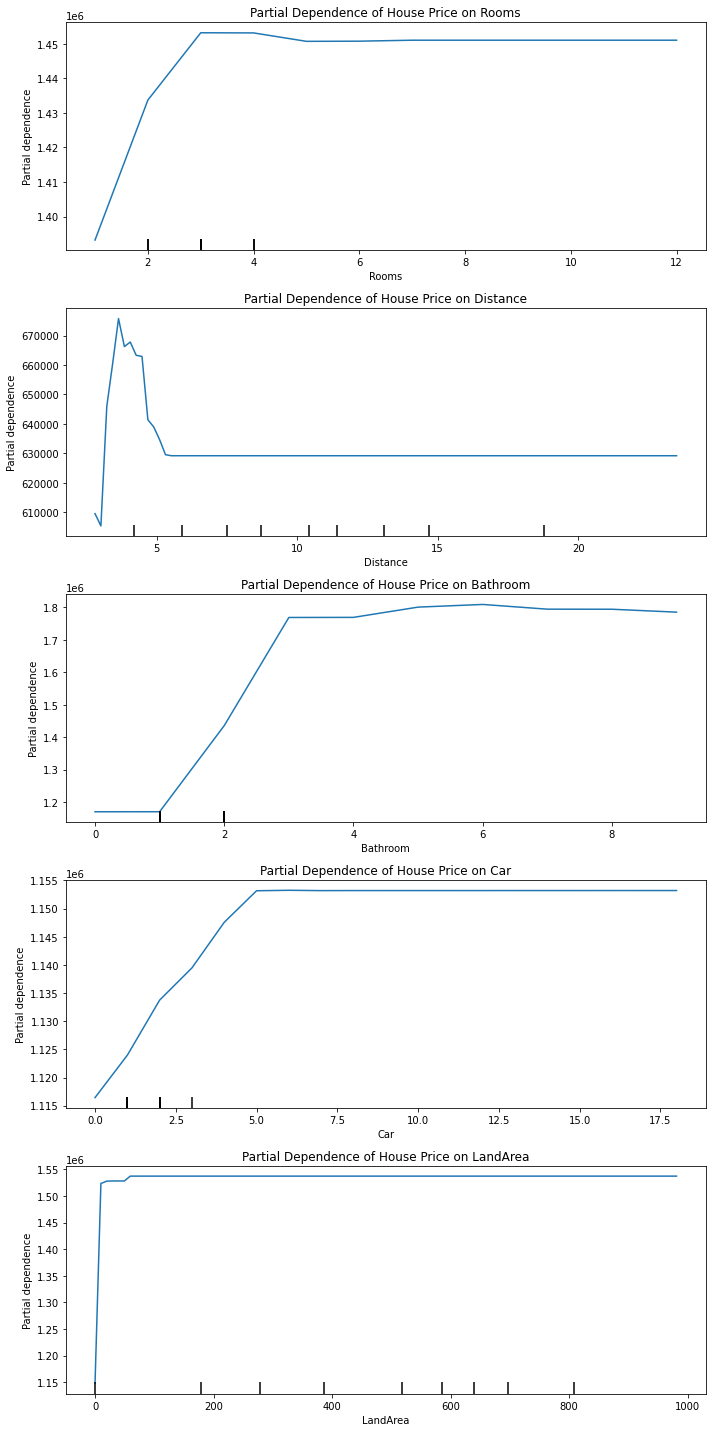

In [131]:
# This part can be ignored because the visualization might be too complicated for the user
# Visualizing the partial dependence of the house price on each feature
features = ['Rooms', 'Distance', 'Bathroom', 'Car', 'LandArea']
n_features = len(features)
fig, axs = plt.subplots(nrows=n_features, ncols=1, figsize=(10, 20))

for i, feature in enumerate(features):
    display = PartialDependenceDisplay.from_estimator(rf_model, X_train, features=[feature], ax=axs[i])
    axs[i].set_title(f'Partial Dependence of House Price on {feature}')
    axs[i].set_ylabel('House Price')
    
plt.tight_layout()

In [140]:
# Predicted price vs suburb average
df_filtered = df[df['Suburb'] == suburb]

In [141]:
df_filtered

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,LandArea
5681,South Yarra,1,u,430000.0,3.3,1,1,0.0
5682,South Yarra,2,u,722000.0,3.3,1,1,0.0
5683,South Yarra,2,u,930000.0,3.3,2,2,0.0
5684,South Yarra,1,u,467500.0,3.3,1,1,0.0
5685,South Yarra,2,u,475000.0,3.3,1,0,0.0
...,...,...,...,...,...,...,...,...
16906,South Yarra,4,h,3030000.0,2.7,1,1,436.0
17396,South Yarra,3,h,2160000.0,2.7,2,0,217.0
17397,South Yarra,3,h,1950000.0,2.7,1,0,252.0
17915,South Yarra,3,h,1720000.0,2.7,2,1,277.0


In [142]:
suburb_avg_price = df_filtered['Price'].mean()

In [143]:
suburb_avg_price

1090192.2374429223

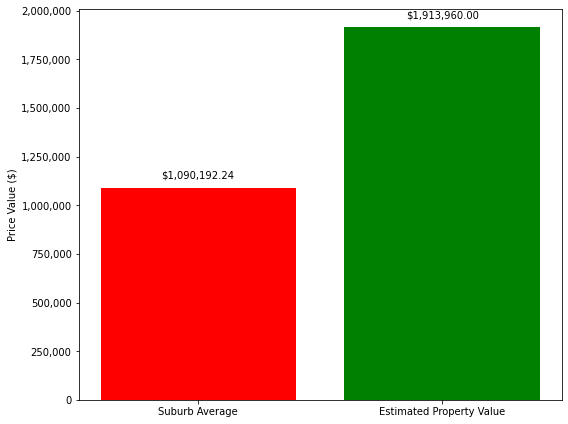

In [157]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Labels and values
labels = ['Suburb Average', 'Estimated Property Value']
values = [suburb_avg_price, predicted_price[0]]

# Colors
colors = ['red', 'green']

# Creating bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=colors)
plt.ylabel('Price Value ($)')
# Format y-axis labels to display in thousands ('K') or millions ('M')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Adding the values on top of the bars
for i, v in enumerate(values):
    plt.text(i, v + 50000, f"${v:,.2f}", color='black', ha='center')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Feature importance comparison
# Predicted price vs suburb average